In [2]:
import pandas as pd




final_table = pd.read_csv('/home/rafael/private/ufrj/CPE727-trabalho-final/data/08_reporting/mlflow_final_results.csv')

In [3]:
final_table.columns

Index(['Run_ID', 'Config_Run_ID', 'Model', 'Config', 'Fold', 'LR', 'Batch',
       'Dropout', 'Freeze', 'Hidden', 'Val_Acc', 'Val_Loss', 'Val_F1',
       'Val_Prec', 'Val_Rec', 'Best_Val_Loss', 'Start_Time', 'End_Time',
       'Duration_min'],
      dtype='object')

In [4]:
# Identify metric columns (numerical columns excluding configuration parameters)
metric_cols = ['Val_Acc', 'Val_Loss', 'Val_F1', 'Val_Prec', 'Val_Rec', 'Best_Val_Loss', 'Duration_min']

# Filter groups that have more than 1 Run_ID
group_counts = final_table.groupby(['Model', 'Config_Run_ID']).size()
valid_groups = group_counts[group_counts > 1].index

# Filter final_table to only include valid groups
filtered_table = final_table.set_index(['Model', 'Config_Run_ID']).loc[valid_groups].reset_index()

# Group by Model and Config_Run_ID and calculate mean and std for metrics, max for Config
grouped = filtered_table.groupby(['Model', 'Config_Run_ID']).agg({
    **{col: ['mean', 'std'] for col in metric_cols},
    'Config': 'max'
})

# Create formatted strings with mean ± std
summary_table = pd.DataFrame(index=grouped.index)
summary_table['Config'] = grouped['Config']['max']

for col in metric_cols:
    summary_table[col] = grouped[col].apply(
        lambda x: f"{x['mean']:.4f} ± {x['std']:.4f}" if pd.notna(x['std']) else f"{x['mean']:.4f}",
        axis=1
    )

summary_table.reset_index(inplace=True)
summary_table

,Model,Config_Run_ID,Config,Val_Acc,Val_Loss,Val_F1,Val_Prec,Val_Rec,Best_Val_Loss,Duration_min
0,mlp,60bc05e6a98c4cbd9e8db8dcb189e63c,0,0.3336 ± 0.0226,1.7809 ± 0.0489,0.2758 ± 0.0261,0.3365 ± 0.0374,0.3336 ± 0.0226,1.7043 ± 0.0162,5.5989 ± 0.6209
1,mlp,b9e6967599c648558771d4441f01b867,0,0.4434 ± 0.0212,1.4905 ± 0.0409,0.4312 ± 0.0354,0.5351 ± 0.0207,0.4434 ± 0.0212,1.4503 ± 0.0310,1.0833 ± 0.1502
2,resnet50,07dad29cad9f46c1992bd9fb878629bd,2,0.8241 ± 0.0085,0.6882 ± 0.0151,0.8233 ± 0.0083,0.8239 ± 0.0082,0.8241 ± 0.0085,0.6837 ± 0.0117,4.4432 ± 0.0828
3,resnet50,0ec1f9a0c59a46c1a71f60c9c9d38bdd,0,0.9163 ± 0.0019,0.2888 ± 0.0034,0.9161 ± 0.0020,0.9170 ± 0.0019,0.9163 ± 0.0019,0.2874 ± 0.0011,35.9544 ± 0.7848
4,resnet50,1f6adb4c0c2344f69212d2a193194ec9,0,0.8718 ± 0.0054,0.3998 ± 0.0262,0.8715 ± 0.0054,0.8719 ± 0.0054,0.8718 ± 0.0054,0.3972 ± 0.0242,4.6536 ± 0.1645
5,resnet50,24f1a916c8484049975ecf26a3f3dcd6,3,0.8057 ± 0.0067,0.8409 ± 0.0156,0.8045 ± 0.0067,0.8063 ± 0.0068,0.8057 ± 0.0067,0.8406 ± 0.0149,3.7283 ± 0.0036
6,resnet50,2d9583fbfea84e5eb3ba1a720be2c7d7,3,0.7933 ± 0.0043,0.9650 ± 0.0079,0.7914 ± 0.0038,0.8122 ± 0.0024,0.7933 ± 0.0043,0.9641 ± 0.0060,35.7627 ± 0.1730
7,resnet50,3ab664d2869b463f9181264cd979dd42,2,0.8281 ± 0.0011,0.7631 ± 0.0025,0.8261 ± 0.0012,0.8365 ± 0.0009,0.8281 ± 0.0011,0.7610 ± 0.0026,36.9798 ± 0.9309
8,resnet50,95c731d50cb6438489bf6fe9c613a812,1,0.9068 ± 0.0012,0.3310 ± 0.0019,0.9066 ± 0.0013,0.9077 ± 0.0015,0.9068 ± 0.0012,0.3299 ± 0.0018,37.6242 ± 0.8503
9,resnet50,cb8e2341f9ca4e06a43e9727be9aa4a4,1,0.8696 ± 0.0069,0.4130 ± 0.0192,0.8695 ± 0.0067,0.8699 ± 0.0065,0.8696 ± 0.0069,0.4114 ± 0.0212,3.8170 ± 0.0076


In [14]:
# Create best models table - select best Config_Run_ID for each model based on Val_Acc
best_models = []

for model in summary_table['Model'].unique():
    model_data = summary_table[summary_table['Model'] == model].copy()

    # Extract mean accuracy from the "mean ± std" string
    model_data['Val_Acc_mean'] = model_data['Val_Acc'].apply(
        lambda x: float(x.split(' ± ')[0])
    )

    # Get the best config (highest validation accuracy)
    best_config = model_data.loc[model_data['Val_Acc_mean'].idxmax()]

    best_models.append({
        'Model': best_config['Model'],
        'Config_Run_ID': best_config['Config_Run_ID'],
        'Config': best_config['Config'],
        'Val_Acc': best_config['Val_Acc'],
        'Val_F1': best_config['Val_F1'],
        'Val_Loss': best_config['Val_Loss']
    })

best_models_table = pd.DataFrame(best_models)
best_models_table.to_csv('/home/rafael/private/ufrj/CPE727-trabalho-final/data/08_reporting/best_models.csv', index=False)

In [15]:
import json
import matplotlib.pyplot as plt
import os

# For each model in best_models_table, find the best fold (Run_ID) based on Val_Acc
best_folds = []

for _, model_row in best_models_table.iterrows():
    model_name = model_row['Model']
    config_run_id = model_row['Config_Run_ID']

    # Filter final_table for this model and config
    model_runs = final_table[
        (final_table['Model'] == model_name) &
        (final_table['Config_Run_ID'] == config_run_id)
    ]

    # Find the best fold based on Val_Acc
    best_fold = model_runs.loc[model_runs['Val_Acc'].idxmax()]

    best_folds.append({
        'Model': model_name,
        'Config_Run_ID': config_run_id,
        'Run_ID': best_fold['Run_ID'],
        'Fold': best_fold['Fold'],
        'Val_Acc': best_fold['Val_Acc']
    })

best_folds_df = pd.DataFrame(best_folds)
best_folds_df

,Model,Config_Run_ID,Run_ID,Fold,Val_Acc
0,mlp,b9e6967599c648558771d4441f01b867,5c8a38b202194aaeae67995edff9ae88,2,0.4669
1,resnet50,0ec1f9a0c59a46c1a71f60c9c9d38bdd,38caf9fb16854f88834234cc4a85cf0f,1,0.9181
2,vgg16,3f5a64eb64504f52bd6889695c53aa36,e05b5d33dd2e4f328b05638b28dc0719,1,0.9789
3,vit_b_16,63ef075bc53441918e2b2530bf2468f9,b80536ced7074cdbb8d5dd58aa0645a6,0,0.9308


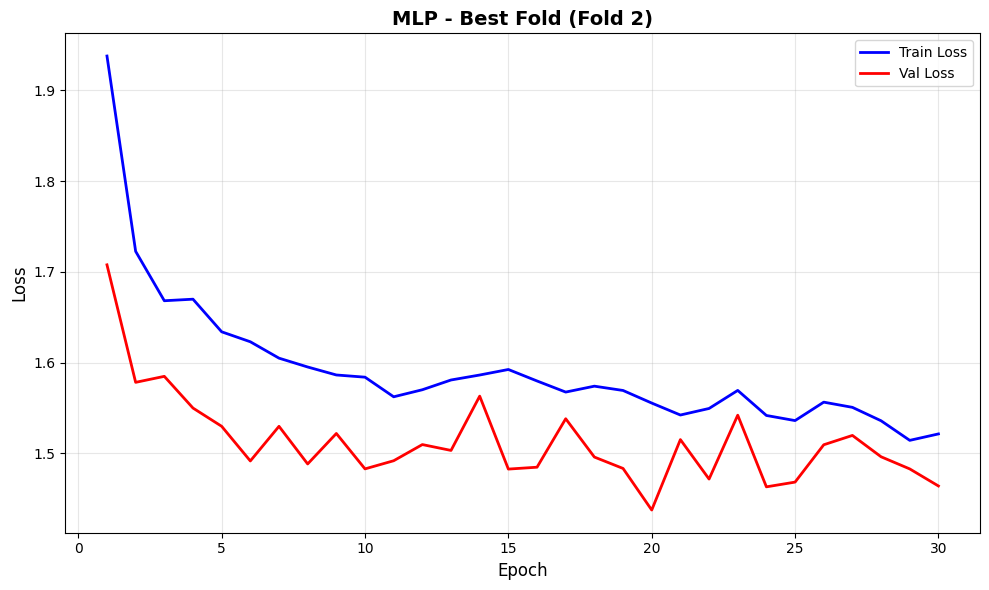

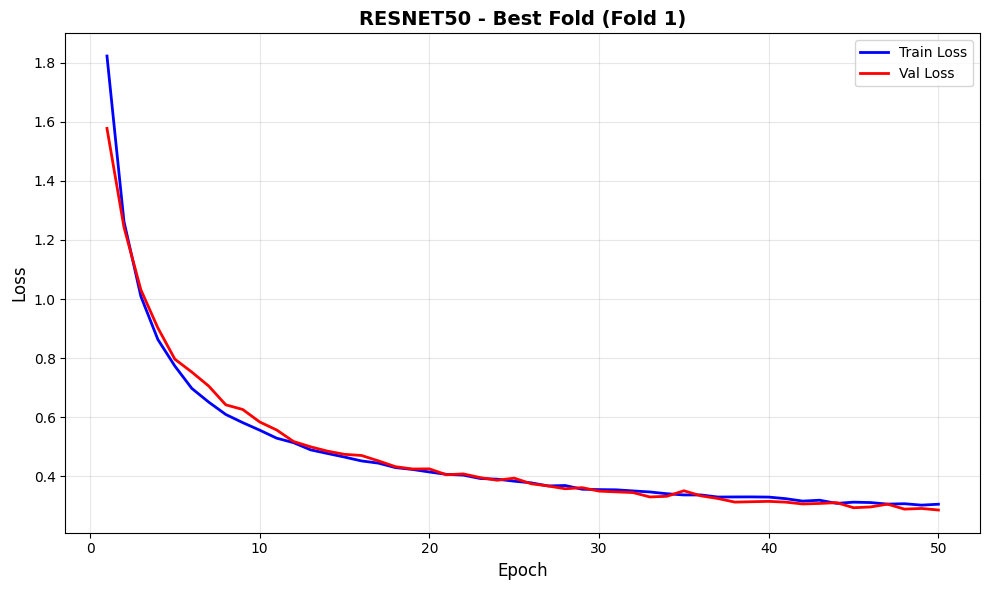

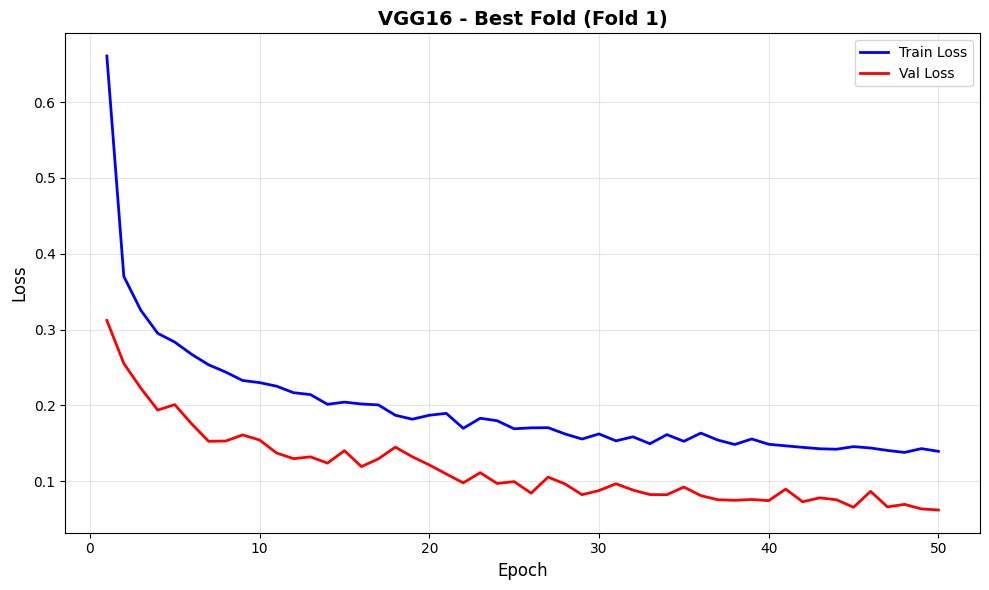

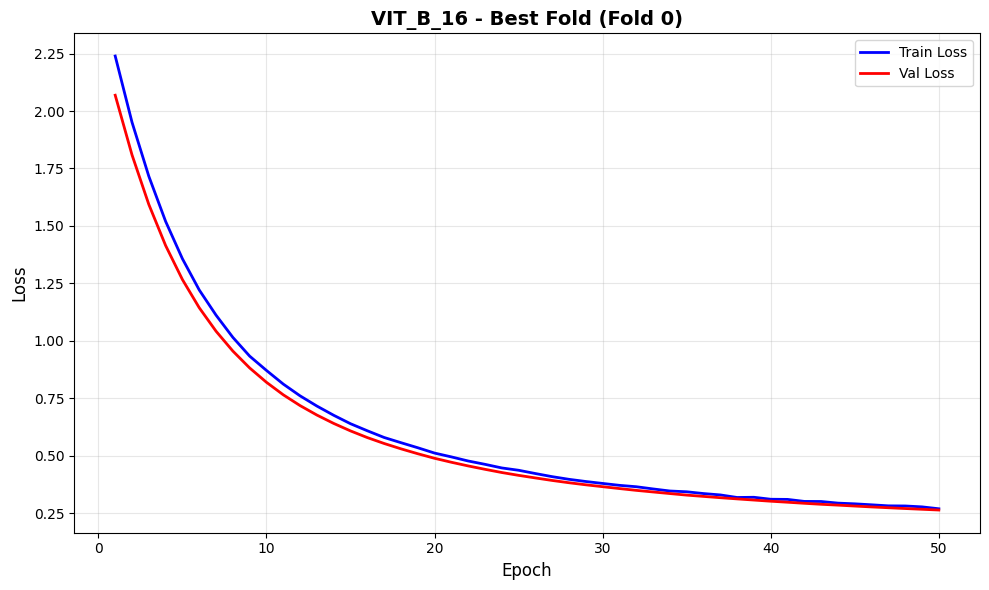

In [16]:
# Plot training/validation loss for best fold of each model
mlruns_path = '/home/rafael/private/ufrj/CPE727-trabalho-final/mlruns/914356777944626268'

for _, row in best_folds_df.iterrows():
    model_name = row['Model']
    run_id = row['Run_ID']
    fold = int(row['Fold'])

    # Load training history
    history_path = f"{mlruns_path}/{run_id}/artifacts/training_history/fold_{fold}_history.json"

    if os.path.exists(history_path):
        with open(history_path, 'r') as f:
            history = json.load(f)

        epochs = range(1, len(history['train_loss']) + 1)

        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
        plt.plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title(f'{model_name.upper()} - Best Fold (Fold {fold})', fontsize=14, fontweight='bold')
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f'History not found for {model_name}')

In [5]:
# Generate LaTeX table for IEEE paper (excluding Duration_min)
latex_cols = ['Model', 'Config_Run_ID', 'Val_Acc', 'Val_Loss', 'Val_F1', 'Val_Prec', 'Val_Rec', 'Best_Val_Loss']
latex_table = summary_table[latex_cols].copy()

# Start building LaTeX table
latex = "\\begin{table*}[htbp]\n"
latex += "\\centering\n"
latex += "\\caption{Model Performance Summary with Mean $\\pm$ Standard Deviation}\n"
latex += "\\label{tab:model_summary}\n"
latex += "\\begin{tabular}{|l|c|c|c|c|c|c|c|}\n"
latex += "\\hline\n"

# Header row
latex += "\\textbf{Model} & \\textbf{Config ID} & \\textbf{Val Acc} & \\textbf{Val Loss} & \\textbf{Val F1} & \\textbf{Val Prec} & \\textbf{Val Rec} & \\textbf{Best Val Loss} \\\\\n"
latex += "\\hline\n"

# Data rows
for _, row in latex_table.iterrows():
    latex += f"{row['Model']} & {row['Config_Run_ID']} & {row['Val_Acc']} & {row['Val_Loss']} & {row['Val_F1']} & {row['Val_Prec']} & {row['Val_Rec']} & {row['Best_Val_Loss']} \\\\\n"

latex += "\\hline\n"
latex += "\\end{tabular}\n"
latex += "\\end{table*}\n"

print(latex)

\begin{table*}[htbp]
\centering
\caption{Model Performance Summary with Mean $\pm$ Standard Deviation}
\label{tab:model_summary}
\begin{tabular}{|l|c|c|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Config ID} & \textbf{Val Acc} & \textbf{Val Loss} & \textbf{Val F1} & \textbf{Val Prec} & \textbf{Val Rec} & \textbf{Best Val Loss} \\
\hline
mlp & 60bc05e6a98c4cbd9e8db8dcb189e63c & 0.3336 ± 0.0226 & 1.7809 ± 0.0489 & 0.2758 ± 0.0261 & 0.3365 ± 0.0374 & 0.3336 ± 0.0226 & 1.7043 ± 0.0162 \\
mlp & b9e6967599c648558771d4441f01b867 & 0.4434 ± 0.0212 & 1.4905 ± 0.0409 & 0.4312 ± 0.0354 & 0.5351 ± 0.0207 & 0.4434 ± 0.0212 & 1.4503 ± 0.0310 \\
resnet50 & 07dad29cad9f46c1992bd9fb878629bd & 0.8241 ± 0.0085 & 0.6882 ± 0.0151 & 0.8233 ± 0.0083 & 0.8239 ± 0.0082 & 0.8241 ± 0.0085 & 0.6837 ± 0.0117 \\
resnet50 & 0ec1f9a0c59a46c1a71f60c9c9d38bdd & 0.9163 ± 0.0019 & 0.2888 ± 0.0034 & 0.9161 ± 0.0020 & 0.9170 ± 0.0019 & 0.9163 ± 0.0019 & 0.2874 ± 0.0011 \\
resnet50 & 1f6adb4c0c2344f69212d2a193194ec9 & 0.8718